<a href="https://colab.research.google.com/github/swarubm/ML-ALGORITHMS/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [12]:
 dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [15]:
x = dataset['Level']
y = dataset['Salary']

In [14]:
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


## Training the Linear Regression model on the whole dataset

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the Linear Regression results

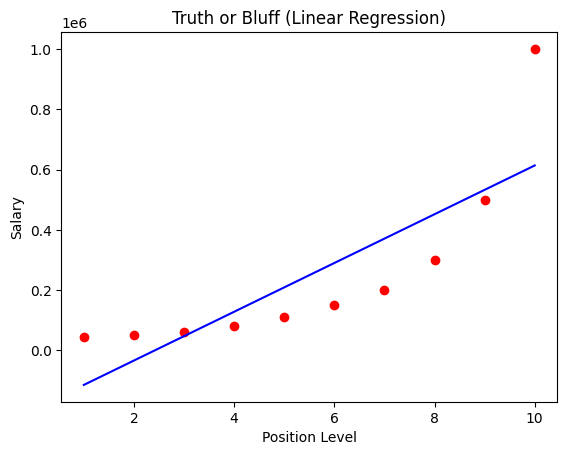

In [5]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

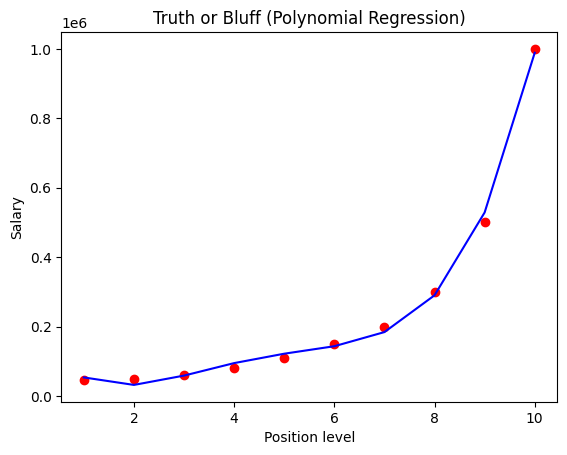

In [6]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

/tmp/ipython-input-3061864919.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


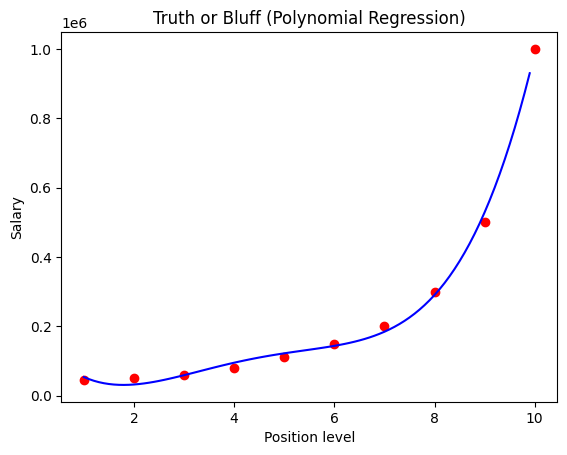

In [7]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [8]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [9]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

R2 1 degree: 0.6690412331929895
RMSE 1 degree: 163388.73519272613
Variance: 33369848484.848484
--------------------------------------
R2 2 degree: 0.9162082221443942
RMSE 2 degree: 82212.12400451249
Variance: 9655476190.476196
--------------------------------------
R2 3 degree: 0.9812097727913366
RMSE 3 degree: 38931.504012329286
Variance: 2526103341.103352
--------------------------------------
R2 4 degree: 0.9973922891706614
RMSE 4 degree: 14503.234909626777
Variance: 420687645.6876337
--------------------------------------


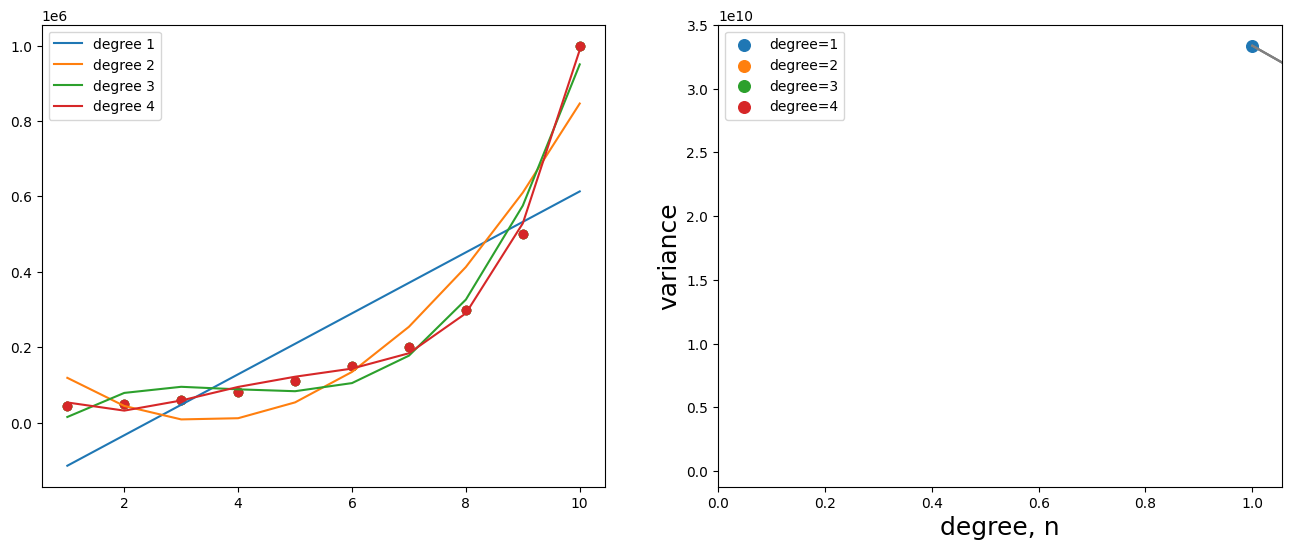

In [11]:
from sklearn.metrics import r2_score, mean_squared_error
def plot_poly(X, y, degree = 1):

    var_array = []
    i_array = []
    plt.figure(figsize=(16, 6))

    for i in range(1, degree+1):
        poly_features = PolynomialFeatures(degree=i)
        X_poly = poly_features.fit_transform(X)
        lm = LinearRegression()
        lm.fit(X_poly, y)
        y_pred = lm.predict(X_poly)
        variance = (np.power(y - y_pred, 2).sum()) / (len(X) - i - 1)
        var_array.append(variance)
        i_array.append(i)
        print(f"R2 {i} degree: {r2_score(y, y_pred)}")
        print(f"RMSE {i} degree: {np.sqrt(mean_squared_error(y, y_pred))}")
        print(f"Variance: {variance}")
        print("--------------------------------------")

        plt.subplot(1, 2, 1)
        plt.scatter(X, y)
        plt.plot(X, y_pred, label=f"degree {i}")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.scatter(i, variance, label=f"degree={i}", s=70)
        plt.plot(i_array, var_array, color="grey")
        plt.xlabel("degree, n", fontsize=18)
        plt.ylabel("variance", fontsize=18)
        plt.xlim(0, )
        plt.legend()
plot_poly(X, y, degree=4)